# Wilcoxon Sign-Ranked Test

Author(s): Miguel Xochicale @mxochicale    
Contributor(s): 


<div> 
    <img src="screen-shot-2019-06-18-at-12.03.49-am.png" width="300"/>
</div>



## Running notebook
```
conda activate simpleVE
jupyter notebook --browser=firefox
```


## Logbook
* 04March2023T0200: Create notebook, solves dependencies and produce working statistics 
* 04March2023T1000: Tidied up notebook and make better senses of statistics to put in the paper
* 05March2023T14ish: added further detials and refernces on tests
    
## References:
* https://pythonfordatascienceorg.wordpress.com/wilcoxon-sign-ranked-test-python/
* IMAGE: https://errorstatistics.com/2019/06/17/the-2019-asa-guide-to-p-values-and-statistical-significance-dont-say-what-you-dont-mean-some-recommendations/
* https://www.reneshbedre.com/blog/mann-whitney-u-test.html
* https://www.marsja.se/how-to-perform-mann-whitney-u-test-in-python-with-scipy-and-pingouin/
* https://pingouin-stats.org/build/html/index.html
* https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon

In [1]:
import pingouin
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt


print(f'Printing package versions')
print(f' pingouin {pingouin.__version__}')
print(f' pandas {pd.__version__}')
print(f' scipy {scipy.__version__}')
print(f' matplotlib {matplotlib.__version__}')

Printing package versions
 pingouin 0.5.3
 pandas 1.5.3
 scipy 1.10.1
 matplotlib 3.7.0


In [2]:
## Average values of responses 
X = ['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10',
     'S11','S12','S13','S14','S15','S16','S17','S18','S19','S20']
Nov14 = [1.77, 1.33, 2.77, 1.77, 2.66, 3.00, 2.11, 3.00, 1.88, 1.77, 
         2.77, 2.33, 2.88, 2.11, 1.66, 1.55, 2.88, 2.33, 1.44, 1.88]
Nov23 = [2.11, 1.66, 2.77, 1.88, 2.44, 2.77, 1.88, 2.22, 1.88, 2.22, 
         2.88, 2.33, 2.66, 2.11, 2.00, 1.44, 2.77, 2.44, 2.11, 2.22]

#empty diff list
diff = []

#two lists are passed to zip 
zip_object = zip(Nov14, Nov23)

#loop to find diff of each element
for list1_i, list2_i in zip_object:
    diff.append(list1_i - list2_i)

data = {'Statements': X,
        'Nov14': Nov14,
        'Nov23': Nov23,   
        'Diff': diff
        }

df = pd.DataFrame(data)
df

,Statements,Nov14,Nov23,Diff
0,S1,1.77,2.11,-0.34
1,S2,1.33,1.66,-0.33
2,S3,2.77,2.77,0.00
3,S4,1.77,1.88,-0.11
4,S5,2.66,2.44,0.22
5,S6,3.00,2.77,0.23
6,S7,2.11,1.88,0.23
7,S8,3.00,2.22,0.78
8,S9,1.88,1.88,0.00
9,S10,1.77,2.22,-0.45


In [3]:
df[['Nov14','Nov23', 'Diff']].describe()

,Nov14,Nov23,Diff
count,20.000000,20.000000,20.000000
mean,2.194500,2.239500,-0.045000
std,0.558367,0.396796,0.319383
min,1.330000,1.440000,-0.670000
25%,1.770000,1.970000,-0.332500
50%,2.110000,2.220000,0.000000
75%,2.770000,2.495000,0.137500
max,3.000000,2.880000,0.780000


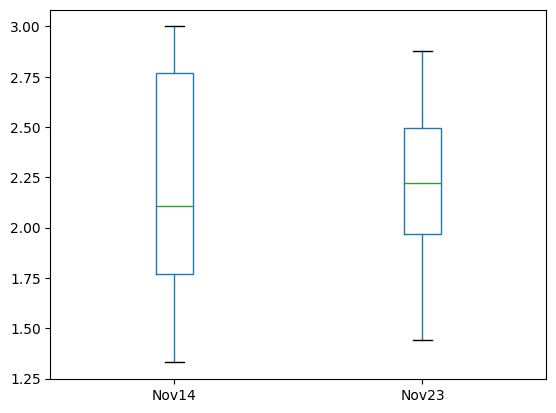

In [4]:
# There doesn’t appear to be any significant outliers in the variables.
df.boxplot(column=['Nov14', 'Nov23'], grid=False)
plt.show()

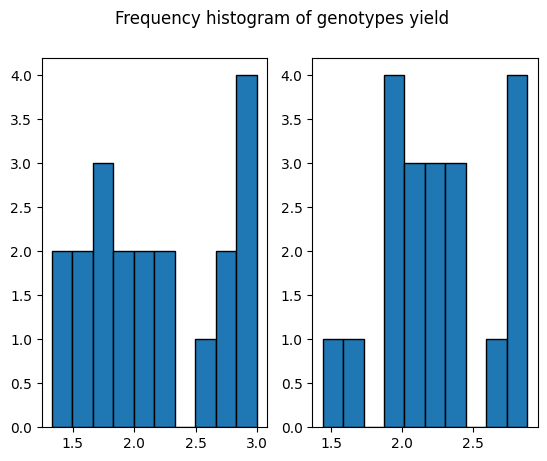

In [5]:
# The histograms of our data does not seem to be normally distributed. There looks to be some skew.
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Frequency histogram of genotypes yield')
ax1.hist(df['Nov14'], bins=10, histtype='bar', ec='k') 
ax2.hist(df['Nov23'], bins=10, histtype='bar', ec='k') 
# ax1.set_xlabel("Yield")
# ax2.set_xlabel("Yield")
#
plt.show()

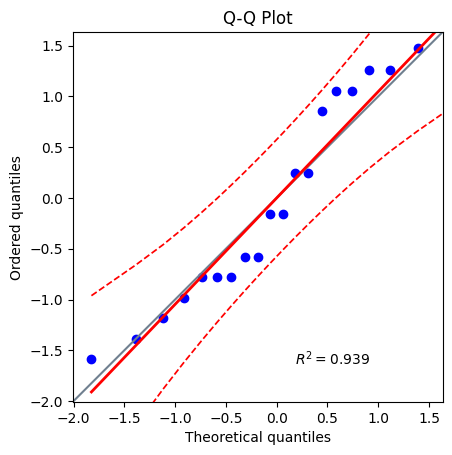

In [6]:
#
# It is easier to see if there are any deviations from normality when the data is plotted as a q-q plot.
# For both of the variables there appears to be some violations from normality particularly at the end of the data. 
#
# stats.probplot(df['bp_before'], dist="norm", plot=plt)
pingouin.qqplot(df['Nov14'], dist='norm')
plt.title("Q-Q Plot")
plt.show()


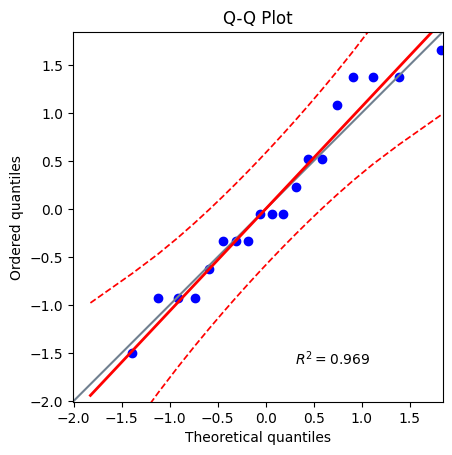

In [7]:
# stats.probplot(df['bp_after'], dist="norm", plot=plt)
pingouin.qqplot(df['Nov23'], dist='norm')
plt.title("Q-Q Plot")
plt.show()

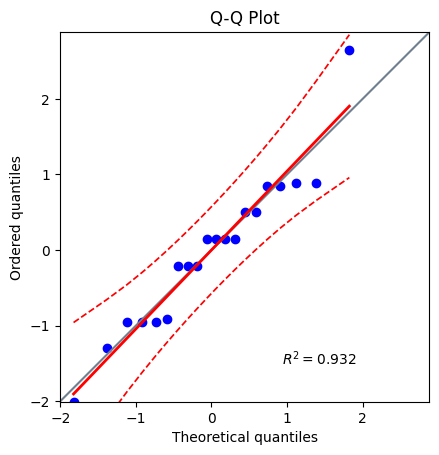

In [8]:
pingouin.qqplot(df['Diff'], dist='norm')
plt.title("Q-Q Plot")
plt.show()

# scipy.stats.shapiro

In [9]:
## Example 

# stats.shapiro(df['bp_before'])
# (0.9547787308692932, 0.0004928423441015184) 

# stats.shapiro(df['bp_after'])
# (0.9740639328956604, 0.020227791741490364) 

# Both of the variables have a significant p-value (p<0.05) which means each variable violates the assumption of normality. 
# Therefore, the Wilcoxon signed rank test, a.k.a the Wilcoxon T test, is the correct test to use 
# to analyze this data.


In [10]:
# Let’s test this statistically to see if the data is normally distributed. 
# To test this, one can use the Shapiro-Wilk test for normality. 
# Unfortunately the output is not labeled. 
# The first value is the W test value, and the second value it the p-value. 


statistic, pvalue = scipy.stats.shapiro(df['Nov14'])

print(f'Statistics={statistic}, p={pvalue}')

# interpret
alpha = 0.05
if pvalue > alpha:
 print('Same distribution (fail to reject H0)')
else:
 print('Different distribution (reject H0)')


# The algorithm used is described in [4] but censoring parameters as described are not implemented. 
# For N > 5000 the W test statistic is accurate but the p-value may not be.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

Statistics=0.9166774153709412, p=0.08553215861320496
Same distribution (fail to reject H0)


In [11]:
statistic, pvalue = scipy.stats.shapiro(df['Nov23'])
print(f'Statistics={statistic}, p={pvalue}')

# interpret
alpha = 0.05
if pvalue > alpha:
 print('Same distribution (fail to reject H0)')
else:
 print('Different distribution (reject H0)')



Statistics=0.9613643884658813, p=0.5714539289474487
Same distribution (fail to reject H0)


In [12]:
statistic, pvalue = scipy.stats.shapiro(df['Diff'])
print(f'Statistics={statistic}, p={pvalue}')

# interpret
alpha = 0.05
if pvalue > alpha:
 print('Same distribution (fail to reject H0)')
else:
 print('Different distribution (reject H0)')

Statistics=0.9481476545333862, p=0.3398457467556
Same distribution (fail to reject H0)





# scipy.stats.wilcoxon




In [13]:
# Computint statistics with parameters to double check we have same results
statistic1, pvalue1 = scipy.stats.wilcoxon(df['Diff'])
statistic2, pvalue2 = scipy.stats.wilcoxon(df['Nov14'], df['Nov23'])
statistic3, pvalue3 = scipy.stats.wilcoxon(df['Diff'], alternative='two-sided')

print(f'Statistics={statistic1}, p={pvalue1}')
print(f'Statistics={statistic2}, p={pvalue2}')
print(f'Statistics={statistic3}, p={pvalue3}')


# alternative{“two-sided”, “greater”, “less”}, optional
# ‘two-sided’: the distribution underlying d is not symmetric about zero.
# ‘less’: the distribution underlying d is stochastically less than a distribution symmetric about zero.
# ‘greater’: the distribution underlying d is stochastically greater than a distribution symmetric about zero.


Statistics=53.5, p=0.45255683361931076
Statistics=53.5, p=0.45255683361931076
Statistics=53.5, p=0.45255683361931076


/home/mxochicale/anaconda3/envs/simpleVE/lib/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [14]:

# interpret
alpha = 0.05
if pvalue1 > alpha:
 print('Same distribution (fail to reject H0) [No statistically significant differences]')
else:
 print('Different distribution (reject H0) [Statistically significant differences]')


Same distribution (fail to reject H0) [No statistically significant differences]


In [15]:
# "To confirm that the median of the differences can be assumed to be positive, we use:"
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon
scipy.stats.wilcoxon(df['Diff'], alternative='greater')


WilcoxonResult(statistic=53.5, pvalue=0.7737215831903446)

In [16]:
scipy.stats.wilcoxon(df['Diff'], method='exact')
# When len(d) is small, the normal approximation may not be accurate, 
# and method='exact' is preferred (at the cost of additional execution time).


WilcoxonResult(statistic=53.5, pvalue=0.45255683361931076)

In [17]:
#Comparing scipy.stats.wilcoxon results with pingouin.wilcoxon
pingouin.wilcoxon(df['Nov14'], df['Nov23'], 
            alternative='two-sided',
            method='exact'
            )

# The p-value is not exactly similar to Pingouin. 
# This is because Pingouin automatically applies a continuity correction. 
# Disabling it gives the same p-value as scipy:

# 'W-val': W-value
# 'alternative': tail of the test : must be one of 'two-sided' (default), 'greater' or 'less'.
# 'p-val': p-value
# 'RBC' : rank-biserial correlation
# 'CLES' : common language effect size
# https://pingouin-stats.org/build/html/generated/pingouin.wilcoxon.html#pingouin.wilcoxon


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,53.5,two-sided,0.468294,-0.213235,0.46375


In [ ]:
# INTERPRETATION OF THE RESULTS

In [ ]:
# A Wilcoxon T test was used to analyze the results of the survey before and after the survey to see 
# if the engineering attidues had a significant effect on pre and post survey of the workshop.
# The average survey before the test was lower (M= 2.194500 ± 0.558367units) 
# compared to the posttest results (M= 2.239500 ± 0.396796units).
# There was no statistically significant in the increase of activtudes towards engineering (t=53.5, p= 0.45).

In [18]:
# INTERPRETATION OF THE RESULTS
# A Wilcoxon T test was used to analyze the results of the survey before and after the survey to see 
# if the engineering attidues had a significant effect on pre and post survey of the workshop.
# The average survey before the test was lower (M= 2.194500 ± 0.558367units) 
# compared to the posttest results (M= 2.239500 ± 0.396796units).
# There was no statistically significant in the increase of activtudes towards engineering (t=53.5, p= 0.45).

# Note: Reported as Wilcoxon T test since Scipy.stats.wilcoxon() method reports the T value and not the W value